<h1>3 Clustering and analysis of residential customers’ gas consumption behavioral using aggregated smart meter data</h1>


Following topics will be discussied: introduction, feature extraction, analysis on number of clusters chosen, k-means clustering implementation, user behavior analysis based on clustering
<h2>3.1 Introduction</h2> 

The wide spread of smart metering roll out enables a better understanding of the consumer behavior and tailoring demand response to achieve cost-efficient energy savings. In the residential sector smart metering allows detailed readings of the power consumption in the form of large volumes time series that encodes relevant information to be found. In our project, we would like to analyze the gas consumption data further by applying clustering method to measure the similarity between the households, and group them based on energy usage. The goal in clustering time‐series data is to understand user behavior by organizing the data into homogeneous groups, maximizing the similarity and dissimilarity within and between groups, respectively.    

Clustering the most important attributes (more in section 3.2 feature extraction) of customers is a very common method for better understanding the different residential energy behaviours that exist and has many applications (Stephen,2015). Potential application areas for work using this form of cluster analysis as more smart data becomes routinely available include
1. Application of cluster results for segment-specific rate design: the economic benefits of time-variable natural gas rates consist in the potential for utilities to improve price discrimination and to facilitate the reduction of peak loads. A complete design of gas scheme would encompass number of different time zones and starting time of each period. All these could be done through clustering analysis. In addition, by influencing the demand side, segment-specific natural gas rates can improve the energy system’s efficiency.

2. Application of cluster results for leak detection activities based on detecting pattern changes (deviation from cluster centroids/ distributions); data-driven models of demand could also help identify atypical customers or unusual changes in consumption. 

3. Application of cluster results for filling missing data for audits/ regulatory purposes using cluster centroids. Typical usage perhaps allows volumetric usage and flow profiles to be estimated for unmetered customers.

<h2>3.2 Feature extraction</h2>

Clustering is a collection of same group similar or data objects or in other groups. Its also finding the dissimilar to the data objects in other groups. In cluster analysis, the main objective is to find similarities between data objects with the help of specific characteristics found in the data and grouping these similar data objects into clusters. Large quantities of information about how customers use their energy is then becoming available through the uptake of smart meters. In our project, the following features and their respective standard deviation will be examined in the following clustering discussion.

<table>
<tr>
<th>Features</th>
<th>Discription</th>
</tr>
<tr>
<td>Total consumption</td>
<td>Total consumed power during period of the study</td>
</tr>
<tr>
<td>Morning consumtption</td>
<td>The consumption observed from 06:00 - 09:00</td>
</tr>
<tr>
<td>Noon consumtption</td>
<td>The consumption observed from 11:00 - 14:00</td>
</tr>
<tr>
<td>Night consumtption</td>
<td>The consumption observed from 17:00 - 20:00</td>
</tr>
</table>

In [52]:
import numpy as np
import pandas as pd
from ipywidgets import FloatProgress
from IPython.display import display
from pathlib import Path
import timeit
import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.decomposition import PCA
from IPython.display import HTML
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import print_function


In [53]:
# headers include all features needed for later discussion
path = str(Path().resolve().parent)+'\csv'
df = pd.read_csv(path+"/hourly_readings_with_consumption.csv")

headers = ["dataid", "totalConsumption", "morningTotal","morningMean", "morningSTD", "noonTotal","noonMean",
          "noonSTD", "nightTotal","nightMean", "nightSTD","elseConsumption"]
currentID = df.iloc[0]['dataid']
baseTime = df.iloc[0]['time'] 
featuresList = []
morningConsumption = []
noonConsumption = []
nightConsumption = []
totalConsumption = 0
elseConsumption = []
currentMorning = 0
currentNoon = 0
currentNight = 0
currentElse = 0
prevDay = df.iloc[0]['day']

In [54]:
# Feature Extraction 
for row in df.itertuples():
    currentTime = row.time
    hrs_diff = int(currentTime.split(":")[0][:2])
    currentDay = row.day
    if (currentDay != prevDay):
        morningConsumption.append(currentMorning)
        noonConsumption.append(currentNoon)
        nightConsumption.append(currentNight)
        elseConsumption.append(currentElse)
        prevDay = currentDay
        currentMorning = 0
        currentNoon = 0
        currentNight = 0
        currentElse = 0
        
    if (currentID != row.dataid):
        features = []
        morningTotal = np.sum(morningConsumption)
        morningMean = np.mean(morningConsumption)
        morningSTD = np.std(morningConsumption)
        
        noonTotal = np.sum(noonConsumption)
        noonMean = np.mean(noonConsumption)
        noonSTD = np.std(noonConsumption)
        
        nightTotal = np.sum(nightConsumption)
        nightMean = np.mean(nightConsumption)
        nightSTD = np.std(nightConsumption)
        elseConsumptionTotal = np.sum(elseConsumption)
        
        features.append(currentID)
        features.append(totalConsumption)
        features.append(morningTotal)
        features.append(morningMean)
        features.append(morningSTD)
        features.append(noonTotal)
        features.append(noonMean)
        features.append(noonSTD)
        features.append(nightTotal)
        features.append(nightMean)
        features.append(nightSTD)
        
        features.append(elseConsumptionTotal)
        featuresList.append(features)
        
        elseConsumption =[]
        morningConsumption = []
        noonConsumption = []
        nightConsumption = []
        totalConsumption = 0
        currentID = row.dataid
    
    totalConsumption = totalConsumption + int(row.consumption)
    if (hrs_diff >= 6 and hrs_diff <= 9):
        currentMorning = currentMorning + int(row.consumption)
    elif (hrs_diff >= 11 and hrs_diff <= 14):
        currentNoon = currentNoon + int(row.consumption)
    elif (hrs_diff >= 17 and hrs_diff <= 20):
        currentNight = currentNight + int(row.consumption)
    else:
        currentElse = currentElse + int(row.consumption)

morningConsumption.append(currentMorning)
noonConsumption.append(currentNoon)
nightConsumption.append(currentNight)
morningMean = np.mean(morningConsumption)
morningSTD = np.std(morningConsumption)
noonMean = np.mean(noonConsumption)
noonSTD = np.std(noonConsumption)
nightMean = np.mean(nightConsumption)
nightSTD = np.std(nightConsumption)
features = []

features.append(currentID)
features.append(totalConsumption)
features.append(morningTotal)
features.append(morningMean)
features.append(morningSTD)
features.append(noonTotal)
features.append(noonMean)
features.append(noonSTD)
features.append(nightTotal)
features.append(nightMean)
features.append(nightSTD)
features.append(elseConsumptionTotal)
featuresList.append(features)

featureFrame = pd.DataFrame(featuresList)
featureFrame.to_csv(path + '/reading_features.csv', header=headers, index=None)

The feature values are normalized to values between 0 and 1 in order to stabilize the algorithm to differences in scale across features. 

In [55]:
df = pd.read_csv(path+"/reading_features.csv")
featureNames = ["totalConsumption", "morningTotal", "noonTotal", "nightTotal"]
# featureNames = ["totalConsumption", "morningMean", "noonMean", "nightMean"]

# Normalise the data for range o to 1
x = df[featureNames].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

<h2>3.3 Analysis on number of clusters chosen</h2>

In order to determine number of clusters we should have, silhouette coefficient is used to quantify the quality of clustering achieved. We will select the number of clusters that maximizes the silhouette coefficient. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette coefficient is calculated as followed and the calculation is implemented in the code below. For each point p, first find the average distance between p and all other points in the same cluster (this is a measure of cohesion, call it A). Then find the average distance between p and all points in the nearest cluster (this is a measure of separation from the closest other cluster, call it B). The silhouette coefficient for p is defined as the difference between B and A divided by the greater of the two (max (A, B)). Figure above provides a silhouette plot for k-means applied with different cluster numbers ranging from 2 to 6. From all the plots below, 3 clusters have a highest average silhouette score which is the optimum solution in our case and this will be used for further discussion.

For n_clusters = 2 The average silhouette_score is : 0.39422206155399053
For n_clusters = 3 The average silhouette_score is : 0.4093610950348011
For n_clusters = 4 The average silhouette_score is : 0.4025451361001917
For n_clusters = 5 The average silhouette_score is : 0.34146348203370286
For n_clusters = 6 The average silhouette_score is : 0.35130206994440766


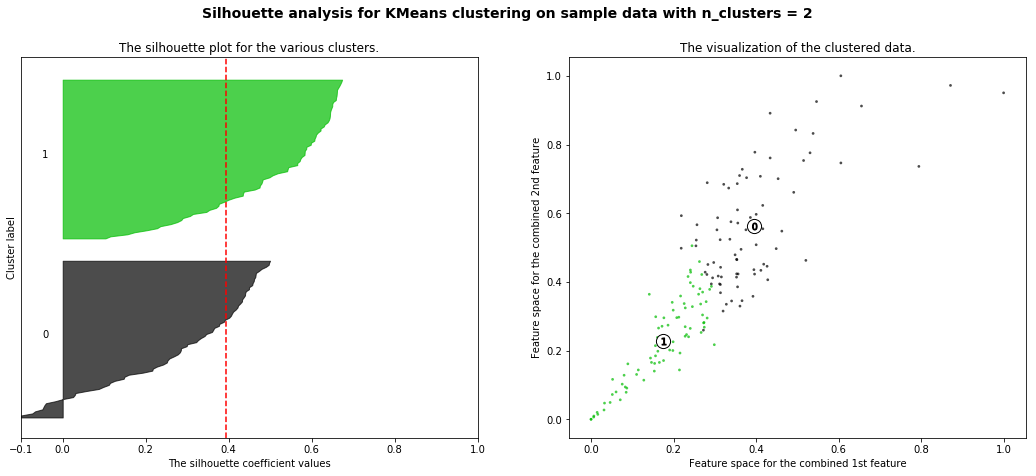

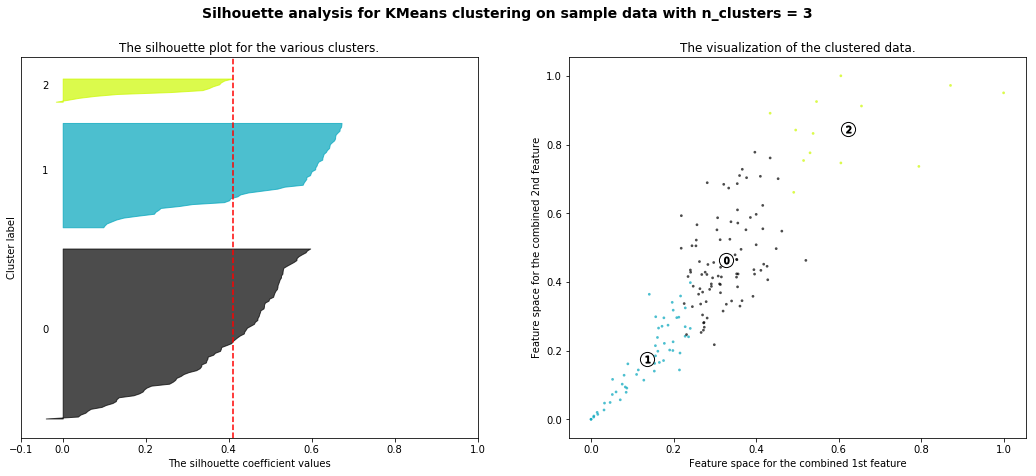

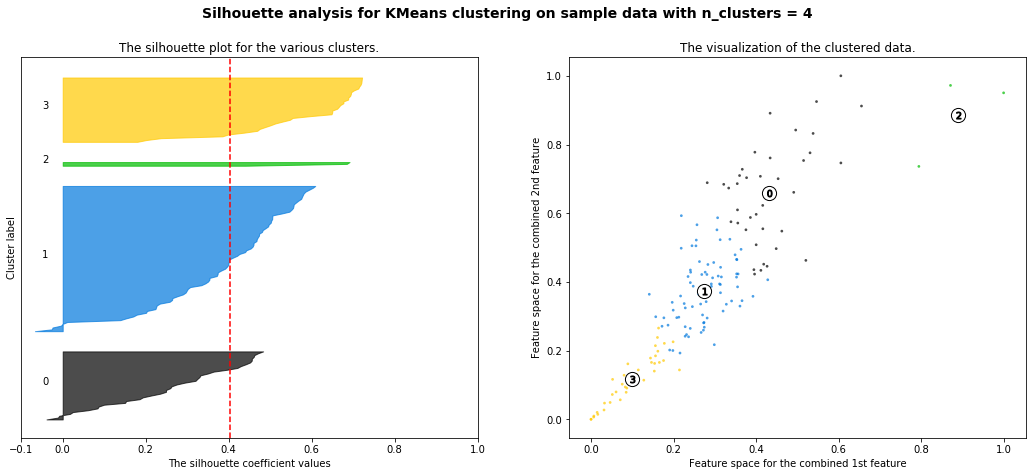

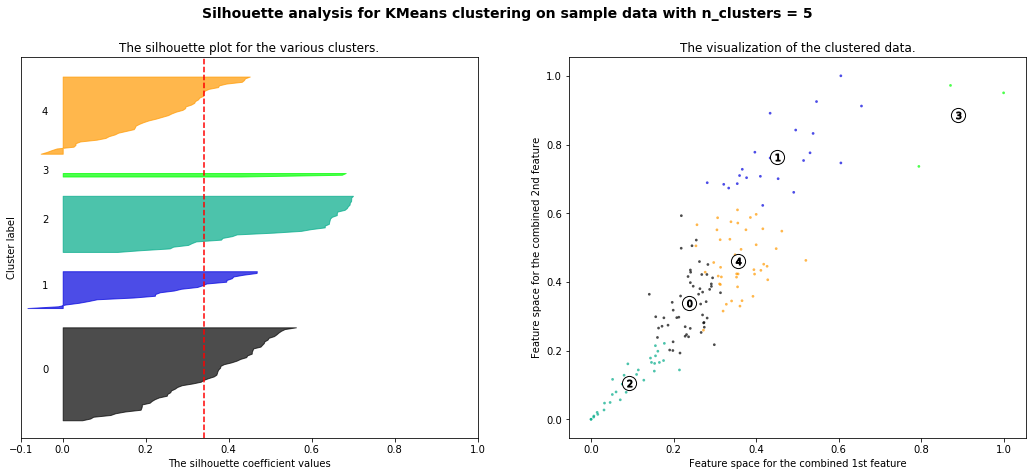

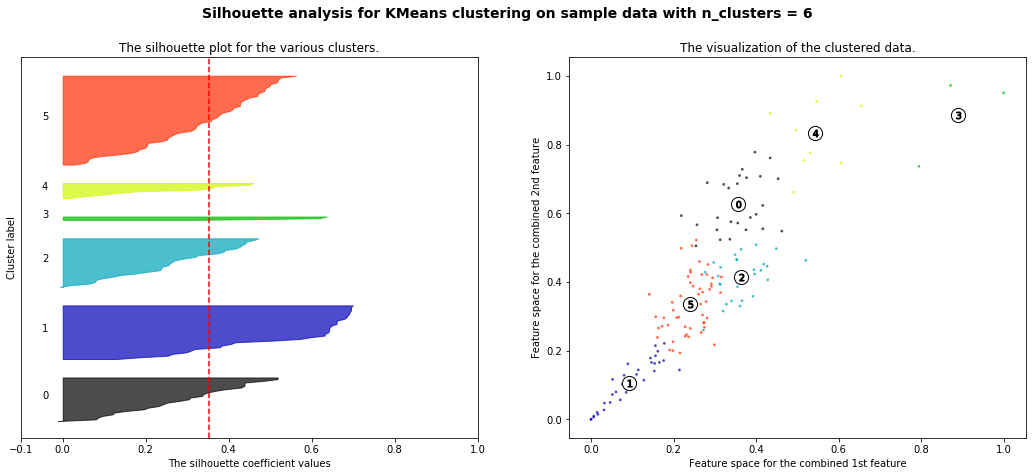

In [56]:
range_n_clusters = [2, 3, 4, 5, 6]
X= df_normalized.values

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # In our example, the silhouette coefficient can range from -0.1. The higher, the better.
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the combined 1st feature")
    ax2.set_ylabel("Feature space for the combined 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

<h2>3.4 K-means clustering implementation</h2>

K-medoids clustering selects the most centrally located data points within clusters as cluster centers called medoids and returns the number of clustering as required.

In [57]:
kmeans = KMeans(n_clusters=3).fit(df_normalized)
df.insert(loc=0, column="classification", value=kmeans.labels_)
df.to_csv(path + '/reading_features_classification.csv', index=None)

Text(0,0.5,'Night Average Consumption')

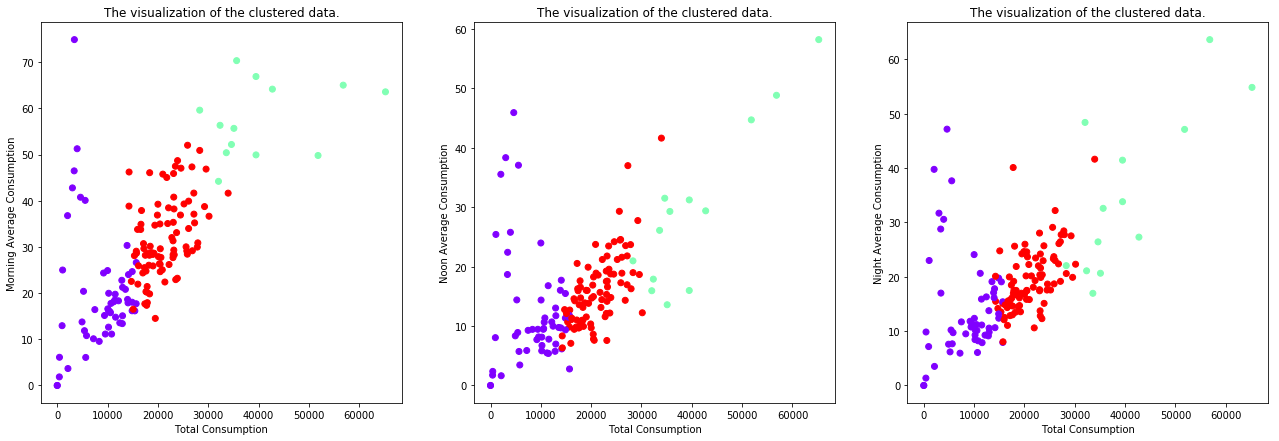

In [58]:
fig, (ax3, ax4,ax5) = plt.subplots(1, 3)
fig.set_size_inches(22, 7)

df_array = df.values
ax3.scatter(df_array[:,2],df_array[:,4], c=kmeans.labels_, cmap='rainbow')  
ax3.set_title("The visualization of the clustered data.")
ax3.set_xlabel('Total Consumption')
ax3.set_ylabel('Morning Average Consumption')

ax4.scatter(df_array[:,2],df_array[:,7], c=kmeans.labels_, cmap='rainbow') 
ax4.set_title("The visualization of the clustered data.")
ax4.set_xlabel('Total Consumption')
ax4.set_ylabel('Noon Average Consumption')

ax5.scatter(df_array[:,2],df_array[:,10], c=kmeans.labels_, cmap='rainbow')  
ax5.set_title("The visualization of the clustered data.")
ax5.set_xlabel('Total Consumption')
ax5.set_ylabel('Night Average Consumption')

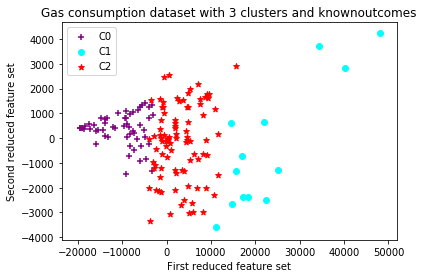

In [65]:
pca = PCA(n_components=2).fit(df[featureNames])
pca_2d = pca.transform(df[featureNames])
for i in range(0, pca_2d.shape[0]):
    if df.classification[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='purple',marker='+')
    elif df.classification[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='cyan',marker='o')
    elif df.classification[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='red',marker='*')
pl.legend([c1, c2, c3], ['C0', 'C1','C2'])
pl.title('Gas consumption dataset with 3 clusters and knownoutcomes')
pl.xlabel('First reduced feature set')
pl.ylabel('Second reduced feature set')
pl.show()

<h2>3.5 User behavior analysis based on clustering</h2>


From the plot above, we able to see that there are three main types of pattern in the dataset: a profile with the typical high morning, noon and night gas consumption (cluster 0), a profile with constant low gas consumption (cluster 1) and finally a profile that has high consumption with no distinct peak hours (cluster 2). 

Cluster 0 grouping has 3 distinct peak usage expected at morning, noon and night time. Data has shown that most consumption of gas happen on morning period (06:00 - 09:00) period and second most consumption happen on the night (17:00 - 20:00).

Cluster 1 groupings have a very low utility rate of natural gas. Those households may be the business man or woman who usually do not cook at home. Those households are predicted to be of the working age 35 to 50 and are the main contribution to the country’s economy. 

Cluster 2 grouping seems to indicate a relatively high consumption pattern with a householder generally at home throughout the day, whilst not possessing distinct morning and evening demand peaks, and there is not a well delineated minimum in between them. Demographics such as age and employment status in particular regions could contribute to this cluster. For example, most of households may be the elderly or jobless people need to stay at home. 

In general, data clustering is used to find similar groups having the same gas consumption patterns. Smart meter data clustering has been widely investigated toward consumers grouping and revealing their energy usage behavior which leads to more efficient tariff policy and tailored energy efficiency programs for specific users.